In [77]:
%matplotlib inline

import sklearn
from sklearn import datasets
from sklearn import svm      # Support Vector Classifier from Support Vector Machine
import matplotlib.pylab as plt

### Import required dataset and check the structure

Datasets

DIGITS : http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits,

http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

IRIS : https://en.wikipedia.org/wiki/Iris_flower_data_set

In [13]:
iris = datasets.load_iris()
digits = datasets.load_digits()
digits.keys()

dict_keys(['DESCR', 'data', 'images', 'target_names', 'target'])

`.data` contains data about the members and it is a `(n_samples X n_features)` array. `Samples` is the number of observations (or rows), `features` is the length of `X` or number of columns or dimension of multivariate `X`.

In [26]:
print(digits.data.shape)  #1797 rows, 64 features
print("\n", digits.data[0])

(1797, 64)

 [  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


In [29]:
# the number corresponding to each digit image that we are trying to learn:

digits.target.shape    # response variable y

(1797,)

In [35]:
# Correct digits
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

The data is always a 2D array, shape (n_samples, n_features), although the original data may have had a different shape. 

In the case of the input digits, each original sample is an image of shape (8, 8) and can be accessed using:

In [34]:
print("\n", digits.images[0].shape)
digits.images[0]


 (8, 8)


array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

# Learning and Predicting

Task is, given a new image, we are to predict which digit it represent. We are given samples of the 10 posible digits (0~9) on which we FIT an ESTIMATOR to be able to PREDICT the classes to which an unseen sample belong.

In [52]:
# An ESTIMATOR is a Python Object which implements .fit(X, y) and .predict(T) where `T` is a new input.
# SVC - Support vector Classification 
clsfier = svm.SVC(gamma=0.001, C=100.)

In [67]:
# Our classifier `clsfier` must learn from the model through fitting. 
# We need pass our training set while reserving the last row for testing.

# We pass both X and response (class) y for training.

training_X = digits.data[:-1]
training_y = digits.target[:-1]

print("\n X dim {}: \n\n y dim {}\n".format(training_X.shape, training_y.shape))

clsfier.fit(training_X, training_y)


 X dim (1796, 64): 

 y dim (1796,)



SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Prediction : [8]
Verify :  [8]


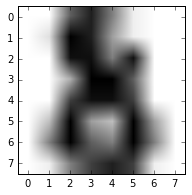

In [92]:
# Classifier object `clsfier` has been trained. We can now PREDICT using the last row reserved for testing.

# We pass the data X not response. i.e. last data row
# Output is the response variable.

test_sample = digits.data[-1:]
test_image = digits.images[-1]

plt.figure(1, figsize=(3,3))
plt.imshow(test_image, cmap=plt.cm.gray_r)

# Predict digit in the image
predct = clsfier.predict(test_sample)
print("Prediction :", predct)

print('Verify : ', digits.target[predct])

In [ ]:
# Parameters `gamma` and `C` can be determined adaptively using `GRID SEARCH` and `CROSS VALIDATION`

In [90]:
digits.images.shape

(1797, 8, 8)